# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key + "&q="
city_data=[]
print("Beginning Data Retrieval")
print("--------------------------------")

for city in cities:
    
    try:          
        city_weather = requests.get(base_url+city).json()
        print(f"Processing Record number {cities.index(city)+1} for city {city}")
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        time.sleep(1)
    except:
        print (f"{city} is missing.")
        pass

Beginning Data Retrieval
--------------------------------
Processing Record number 1 for city ahumada
ahumada is missing.
Processing Record number 2 for city narsaq
Processing Record number 3 for city kavieng
Processing Record number 4 for city hobart
Processing Record number 5 for city nanortalik
Processing Record number 6 for city kapaa
Processing Record number 7 for city ushuaia
Processing Record number 8 for city punta arenas
Processing Record number 9 for city rongcheng
Processing Record number 10 for city pisco
Processing Record number 11 for city waipawa
Processing Record number 12 for city mataura
Processing Record number 13 for city aliwal north
Processing Record number 14 for city cherskiy
Processing Record number 15 for city bambous virieux
Processing Record number 16 for city port alfred
Processing Record number 17 for city petropavlovsk-kamchatskiy
Processing Record number 18 for city fortuna
Processing Record number 19 for city bairiki
Processing Record number 20 for city

Processing Record number 166 for city nizhneyansk
nizhneyansk is missing.
Processing Record number 167 for city mahebourg
Processing Record number 168 for city alofi
Processing Record number 169 for city xiuyan
Processing Record number 170 for city luebo
Processing Record number 171 for city lagoa
Processing Record number 172 for city atuona
Processing Record number 173 for city guerrero negro
Processing Record number 174 for city yatou
Processing Record number 175 for city santiago del estero
Processing Record number 176 for city nioro
Processing Record number 177 for city olafsvik
Processing Record number 178 for city ribeira grande
Processing Record number 179 for city hays
Processing Record number 180 for city umarkot
Processing Record number 181 for city mar del plata
Processing Record number 182 for city broken hill
Processing Record number 183 for city vostok
Processing Record number 184 for city bengkulu
Processing Record number 185 for city coquimbo
Processing Record number 18

Processing Record number 332 for city matara
Processing Record number 333 for city alyangula
Processing Record number 334 for city ugoofaaru
Processing Record number 335 for city kota kinabalu
Processing Record number 336 for city ishcherskaya
Processing Record number 337 for city ndjole
Processing Record number 338 for city grand river south east
grand river south east is missing.
Processing Record number 339 for city alugan
Processing Record number 340 for city tursunzoda
Processing Record number 341 for city lavrentiya
Processing Record number 342 for city boddam
Processing Record number 343 for city ukiah
Processing Record number 344 for city sao joao da barra
Processing Record number 345 for city fort abbas
Processing Record number 346 for city samarai
Processing Record number 347 for city mayor pablo lagerenza
Processing Record number 348 for city erenhot
Processing Record number 349 for city winfield
Processing Record number 350 for city bure
Processing Record number 351 for cit

Processing Record number 501 for city kailua
Processing Record number 502 for city inderka
Processing Record number 503 for city lake havasu city
Processing Record number 504 for city lamar
Processing Record number 505 for city henties bay
Processing Record number 506 for city giyani
Processing Record number 507 for city karratha
Processing Record number 508 for city jinxiang
Processing Record number 509 for city vila
Processing Record number 510 for city rock springs
Processing Record number 511 for city diapaga
Processing Record number 512 for city uruacu
Processing Record number 513 for city mandiana
Processing Record number 514 for city filadelfia
Processing Record number 515 for city port washington
Processing Record number 516 for city colares
Processing Record number 517 for city port keats
Processing Record number 518 for city chandler
Processing Record number 519 for city olinda
Processing Record number 520 for city satipo
Processing Record number 521 for city nishihara
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_data_df=pd.DataFrame(city_data)
city_data_df.to_csv(output_data_file)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,narsaq,60.92,-46.05,47.53,68,100,2.48,GL,1598568909
1,kavieng,-2.57,150.80,83.16,72,49,5.26,PG,1598568910
2,hobart,-42.88,147.33,52.00,57,75,18.34,AU,1598568676
3,nanortalik,60.14,-45.24,49.46,71,100,12.75,GL,1598568912
4,kapaa,22.08,-159.32,86.00,58,20,12.75,US,1598568856


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

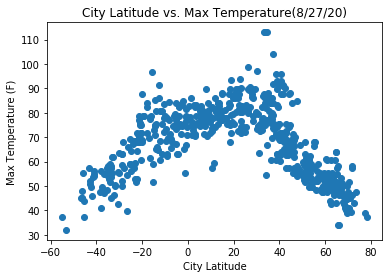

In [15]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature(8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

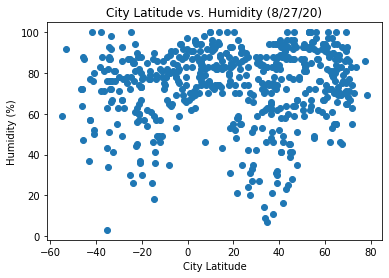

In [43]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
plt.title("City Latitude vs. Humidity (8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

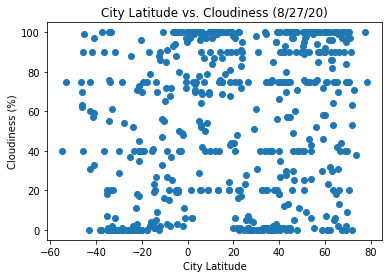

In [38]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

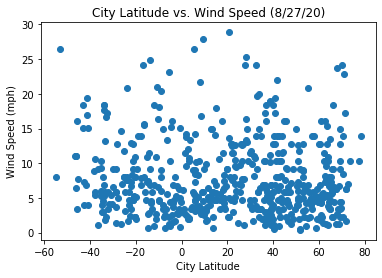

In [50]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [51]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5658007010705024


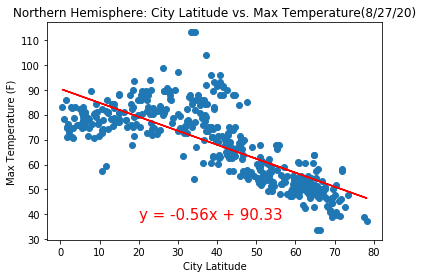

In [30]:
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature(8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5928322199526469


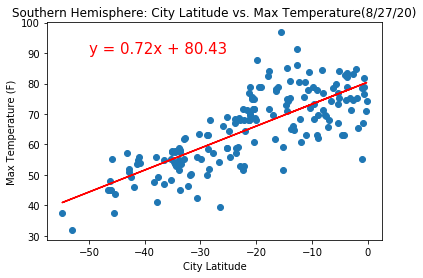

In [52]:
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature(8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.1152680945609259e-05


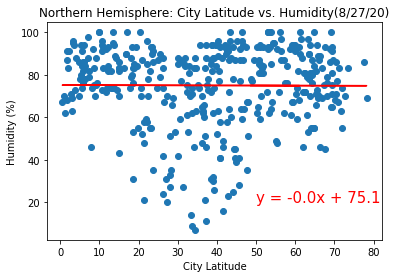

In [44]:
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])
plt.title("Northern Hemisphere: City Latitude vs. Humidity(8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009315316306526324


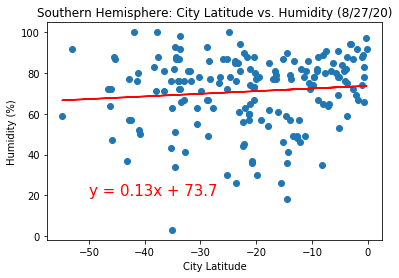

In [45]:
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])
plt.title("Southern Hemisphere: City Latitude vs. Humidity (8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 2.554757284442458e-05


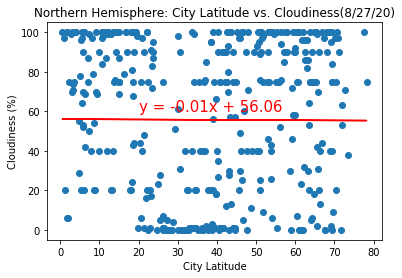

In [41]:
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness(8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01572865099897285


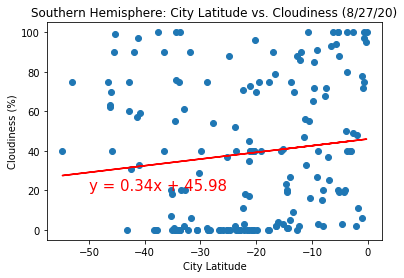

In [42]:
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0017354807064688933


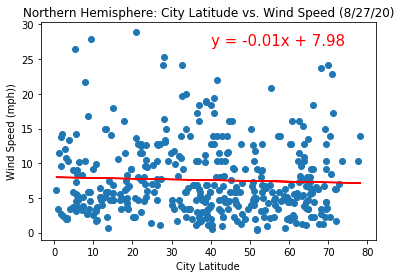

In [47]:
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph))")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,27),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03518967899795778


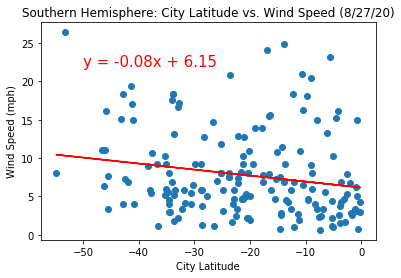

In [49]:
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (8/27/20)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = f"y = {(round(slope,2))}x + {round(intercept,2)}"
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()